In [1]:
from google.colab import files
uploaded = files.upload()

Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new.csv


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# EDA Phase

In [3]:
df=pd.read_csv('Heart_disease_cleveland_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [5]:
df.shape

(303, 14)

In [6]:
# Checking Nulls
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
# Check Duplicate
df.duplicated().sum()

np.int64(0)

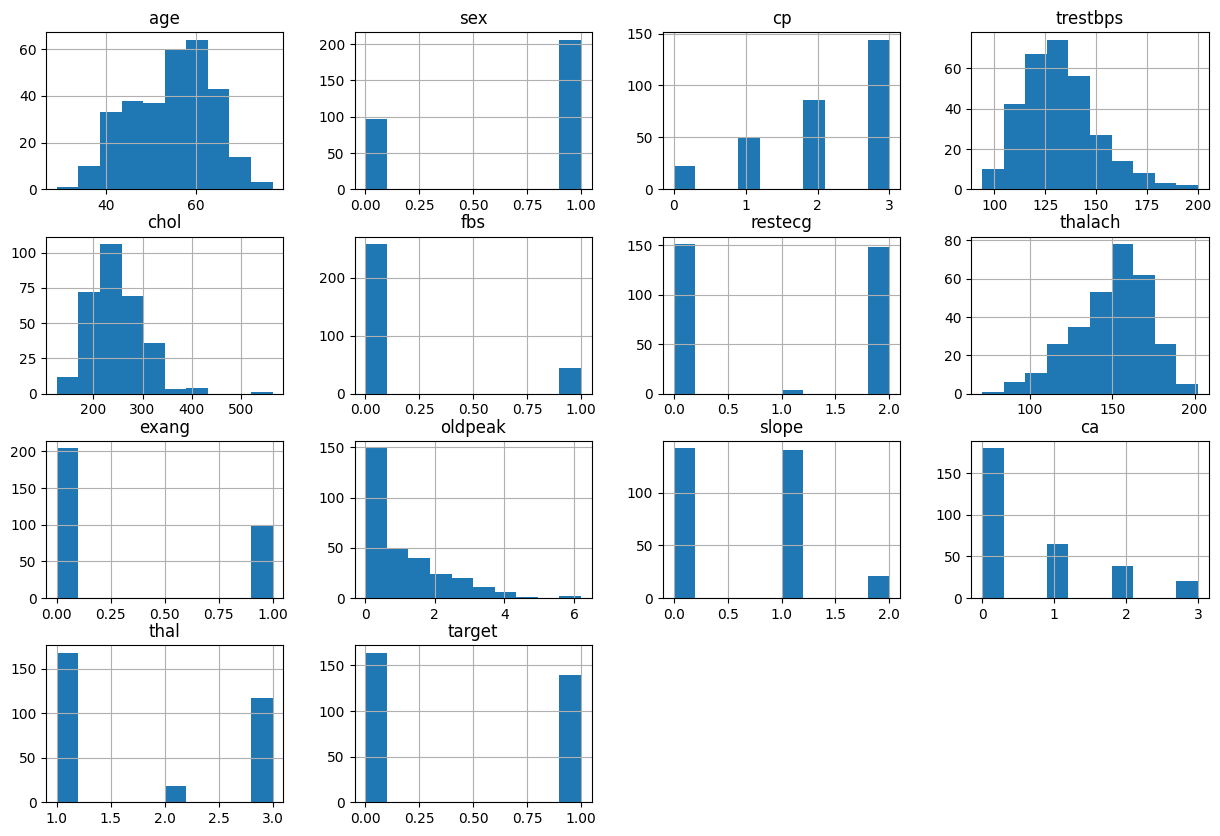

In [10]:
df.hist(figsize=(15,10))
plt.show()

In [11]:
df['target'].value_counts()

,count
target,
0,164
1,139


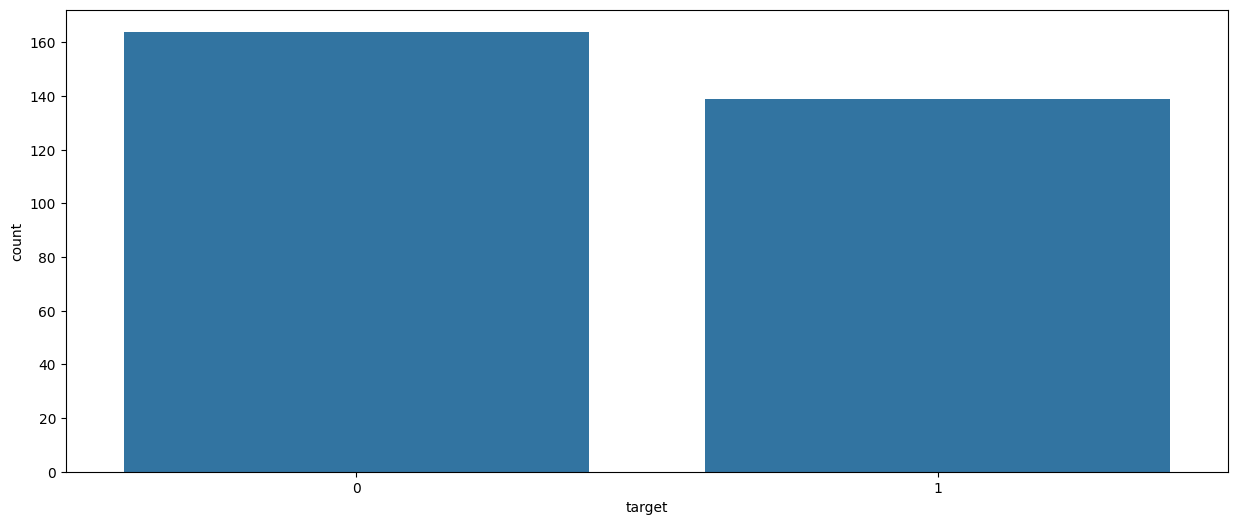

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='target',data=df)
plt.show()

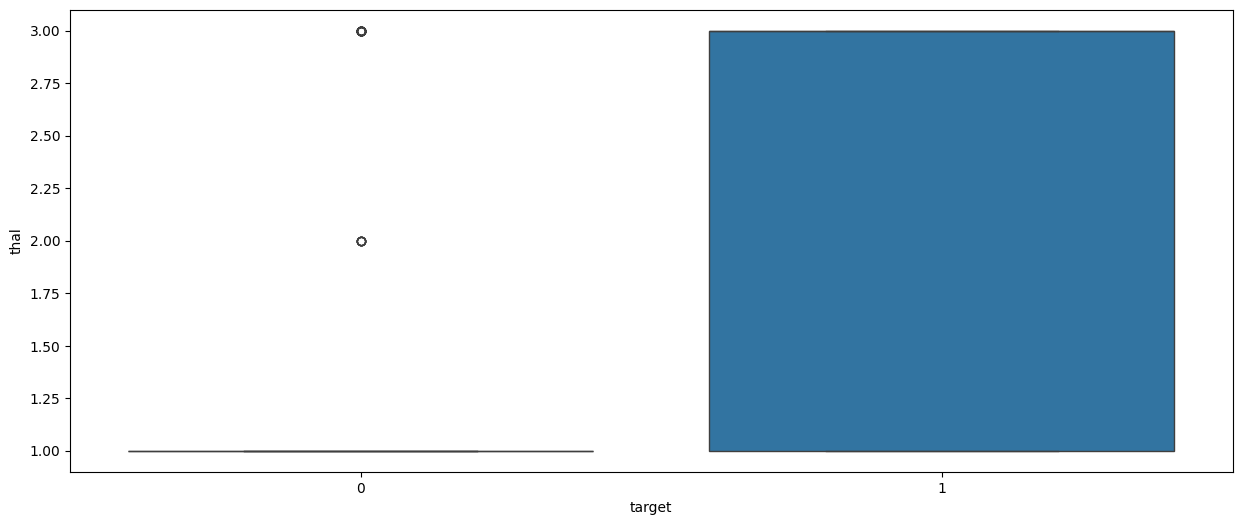

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='thal',data=df)
plt.show()

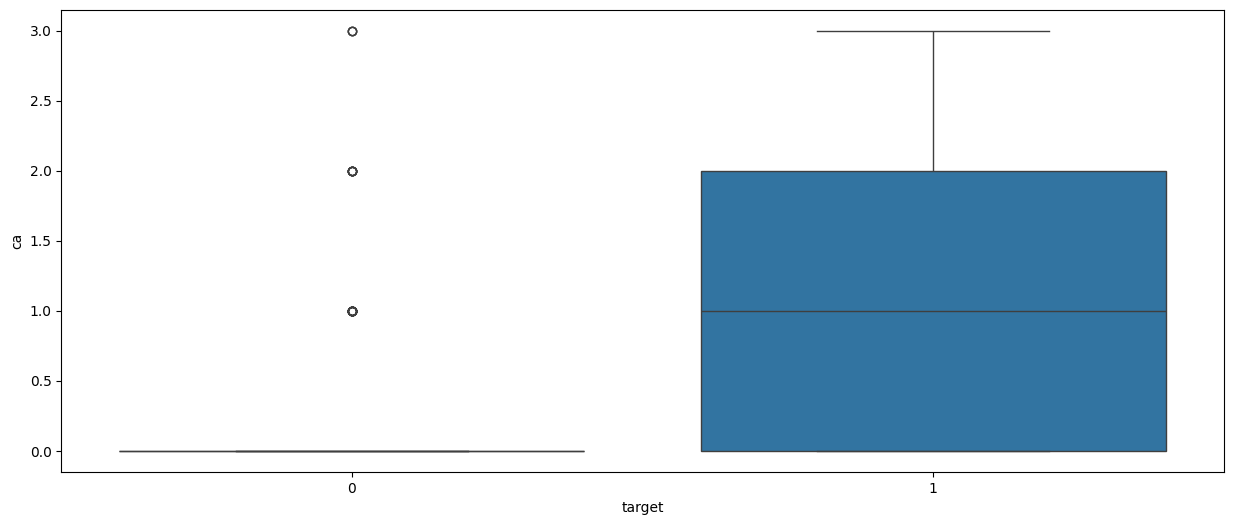

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='ca',data=df)
plt.show()

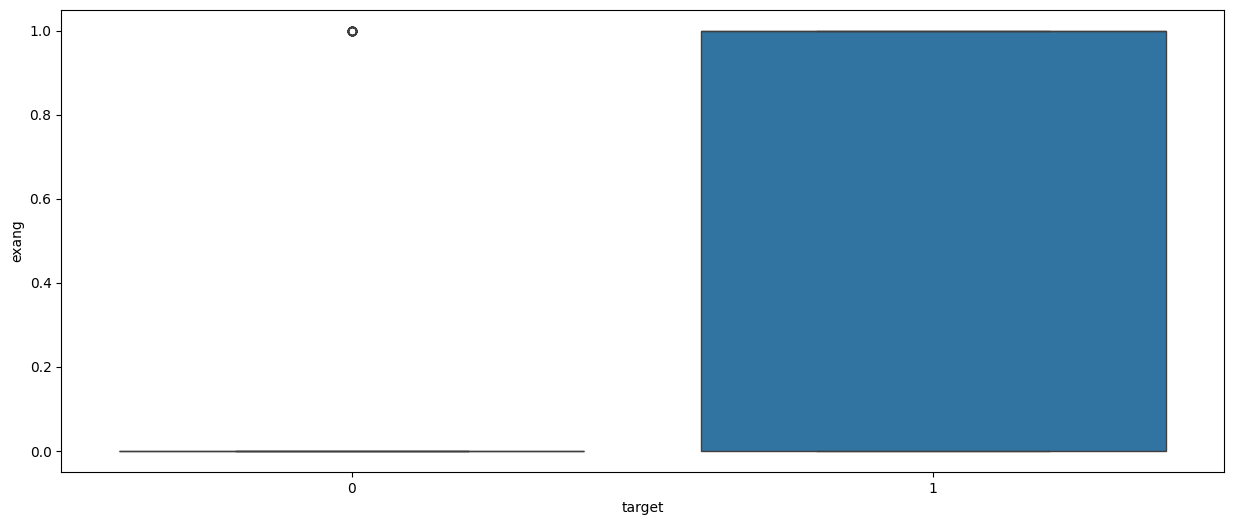

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='exang',data=df)
plt.show()

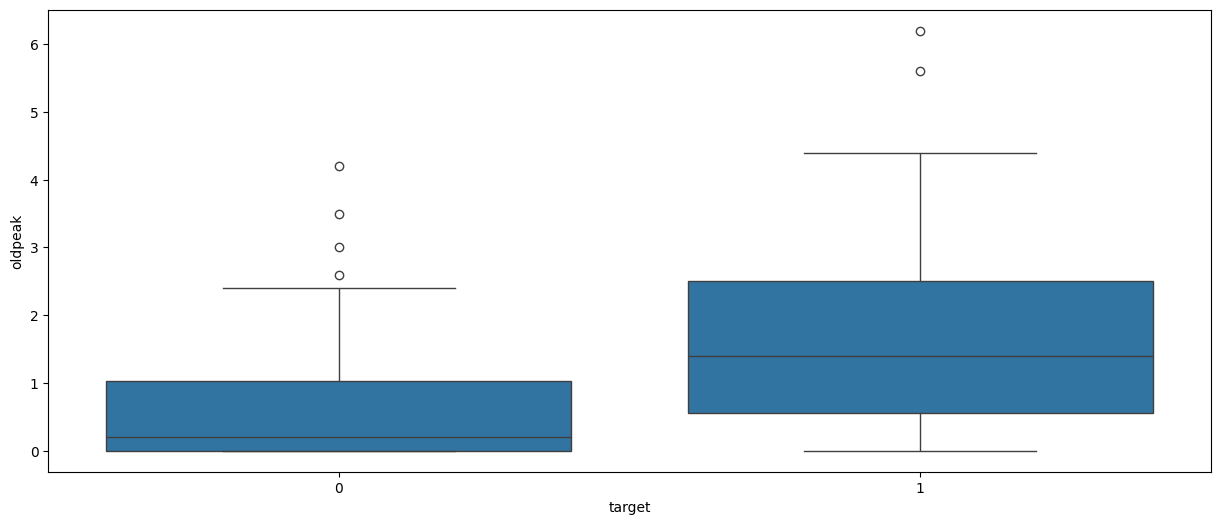

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='oldpeak',data=df)
plt.show()

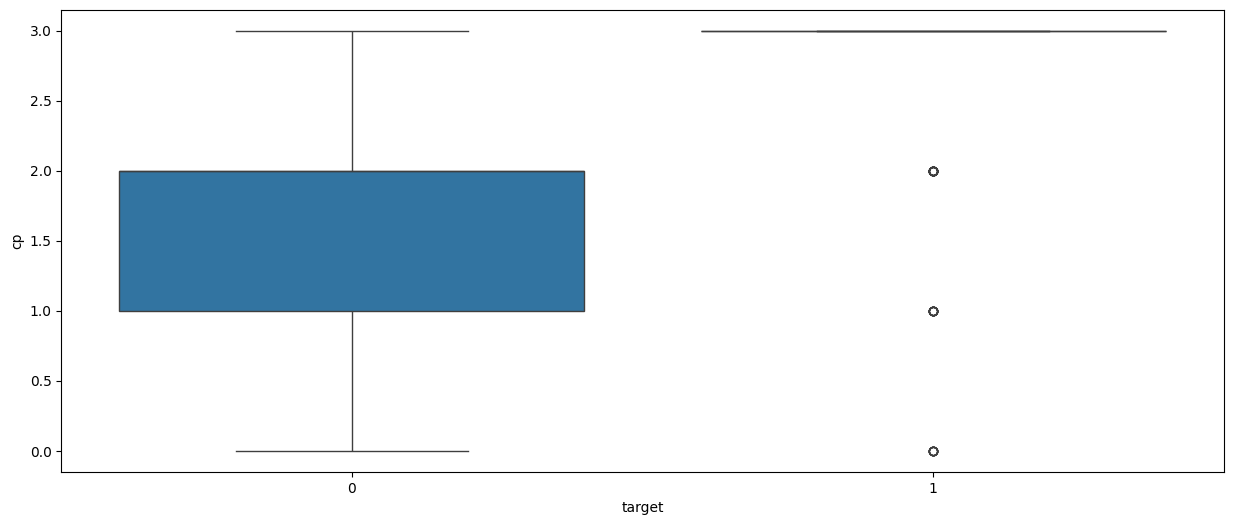

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='cp',data=df)
plt.show()

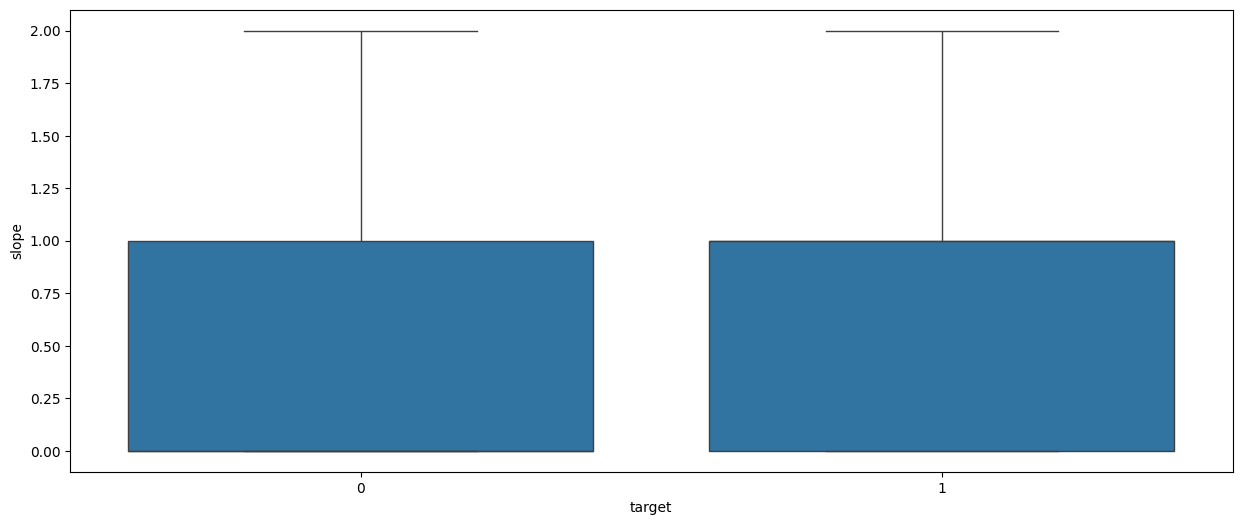

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x='target',y='slope',data=df)
plt.show()

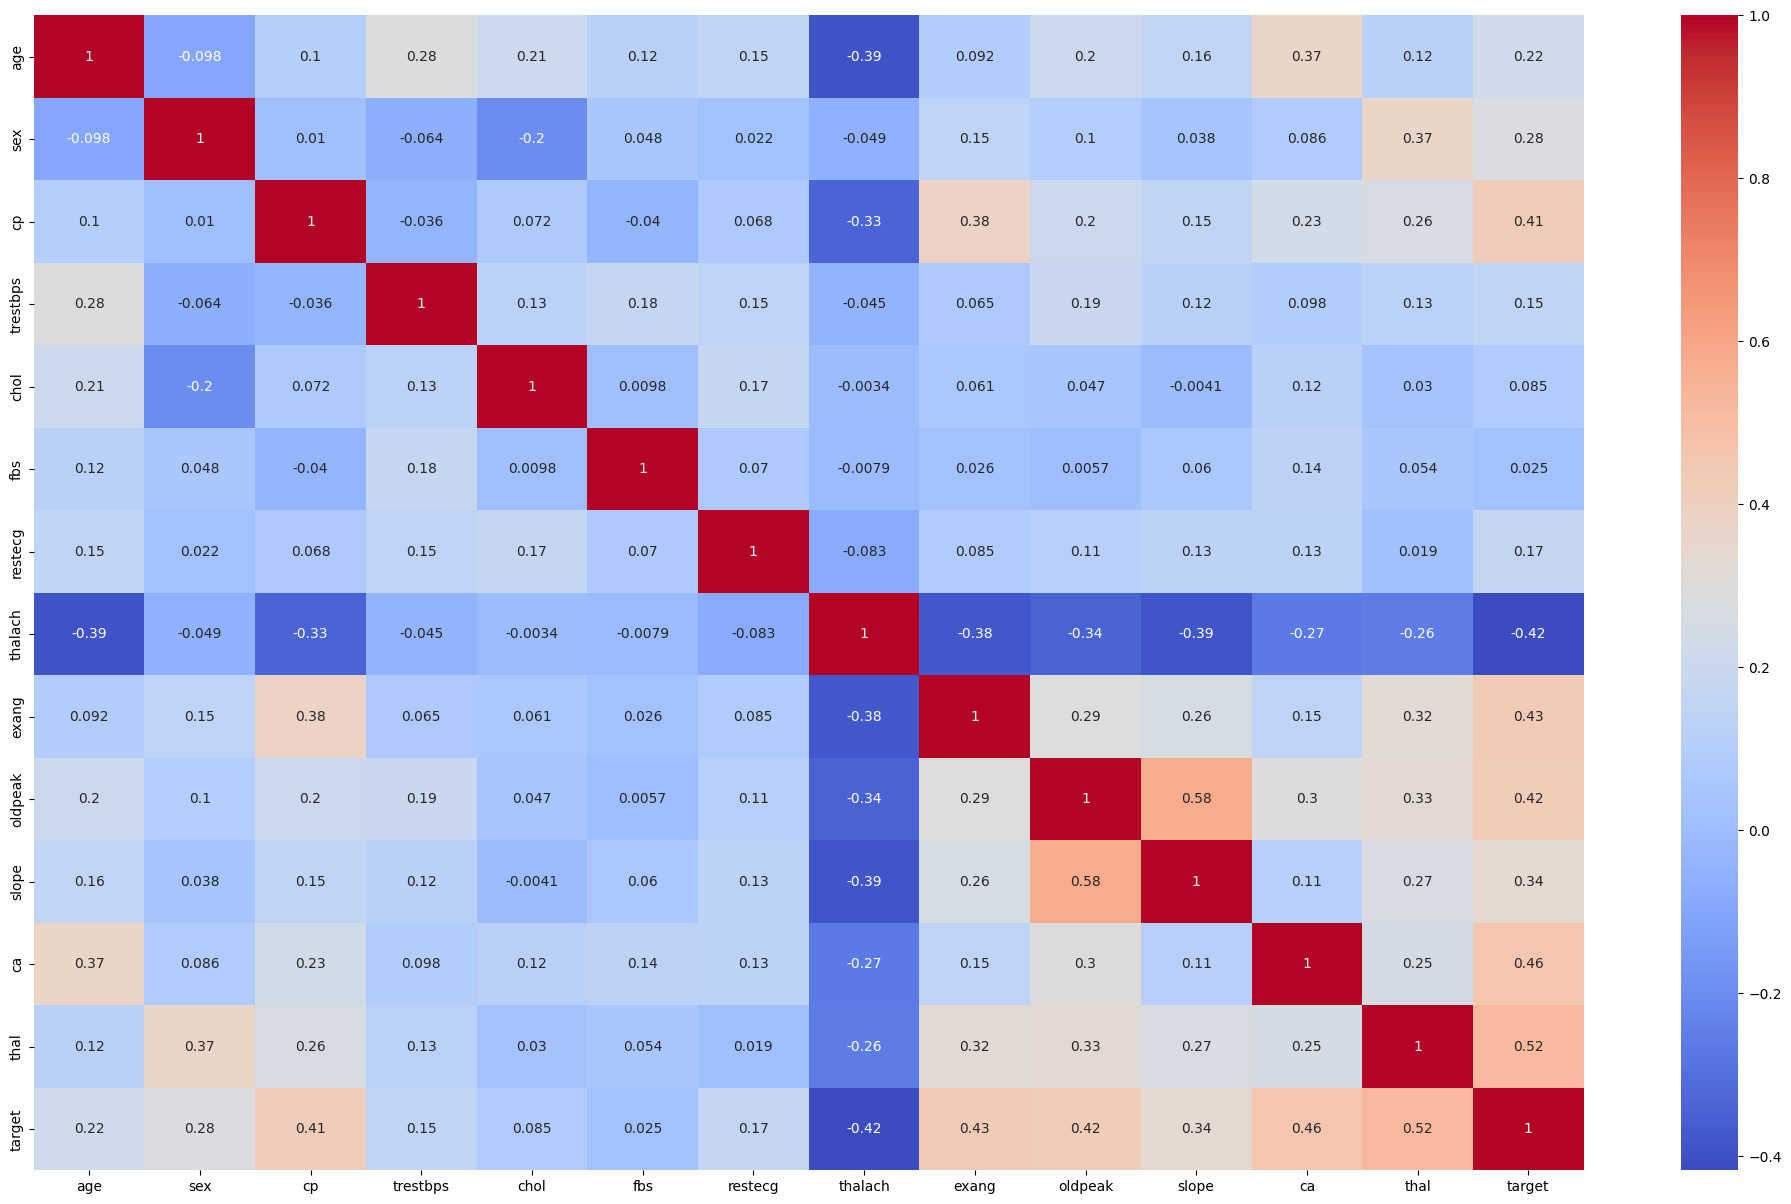

In [19]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

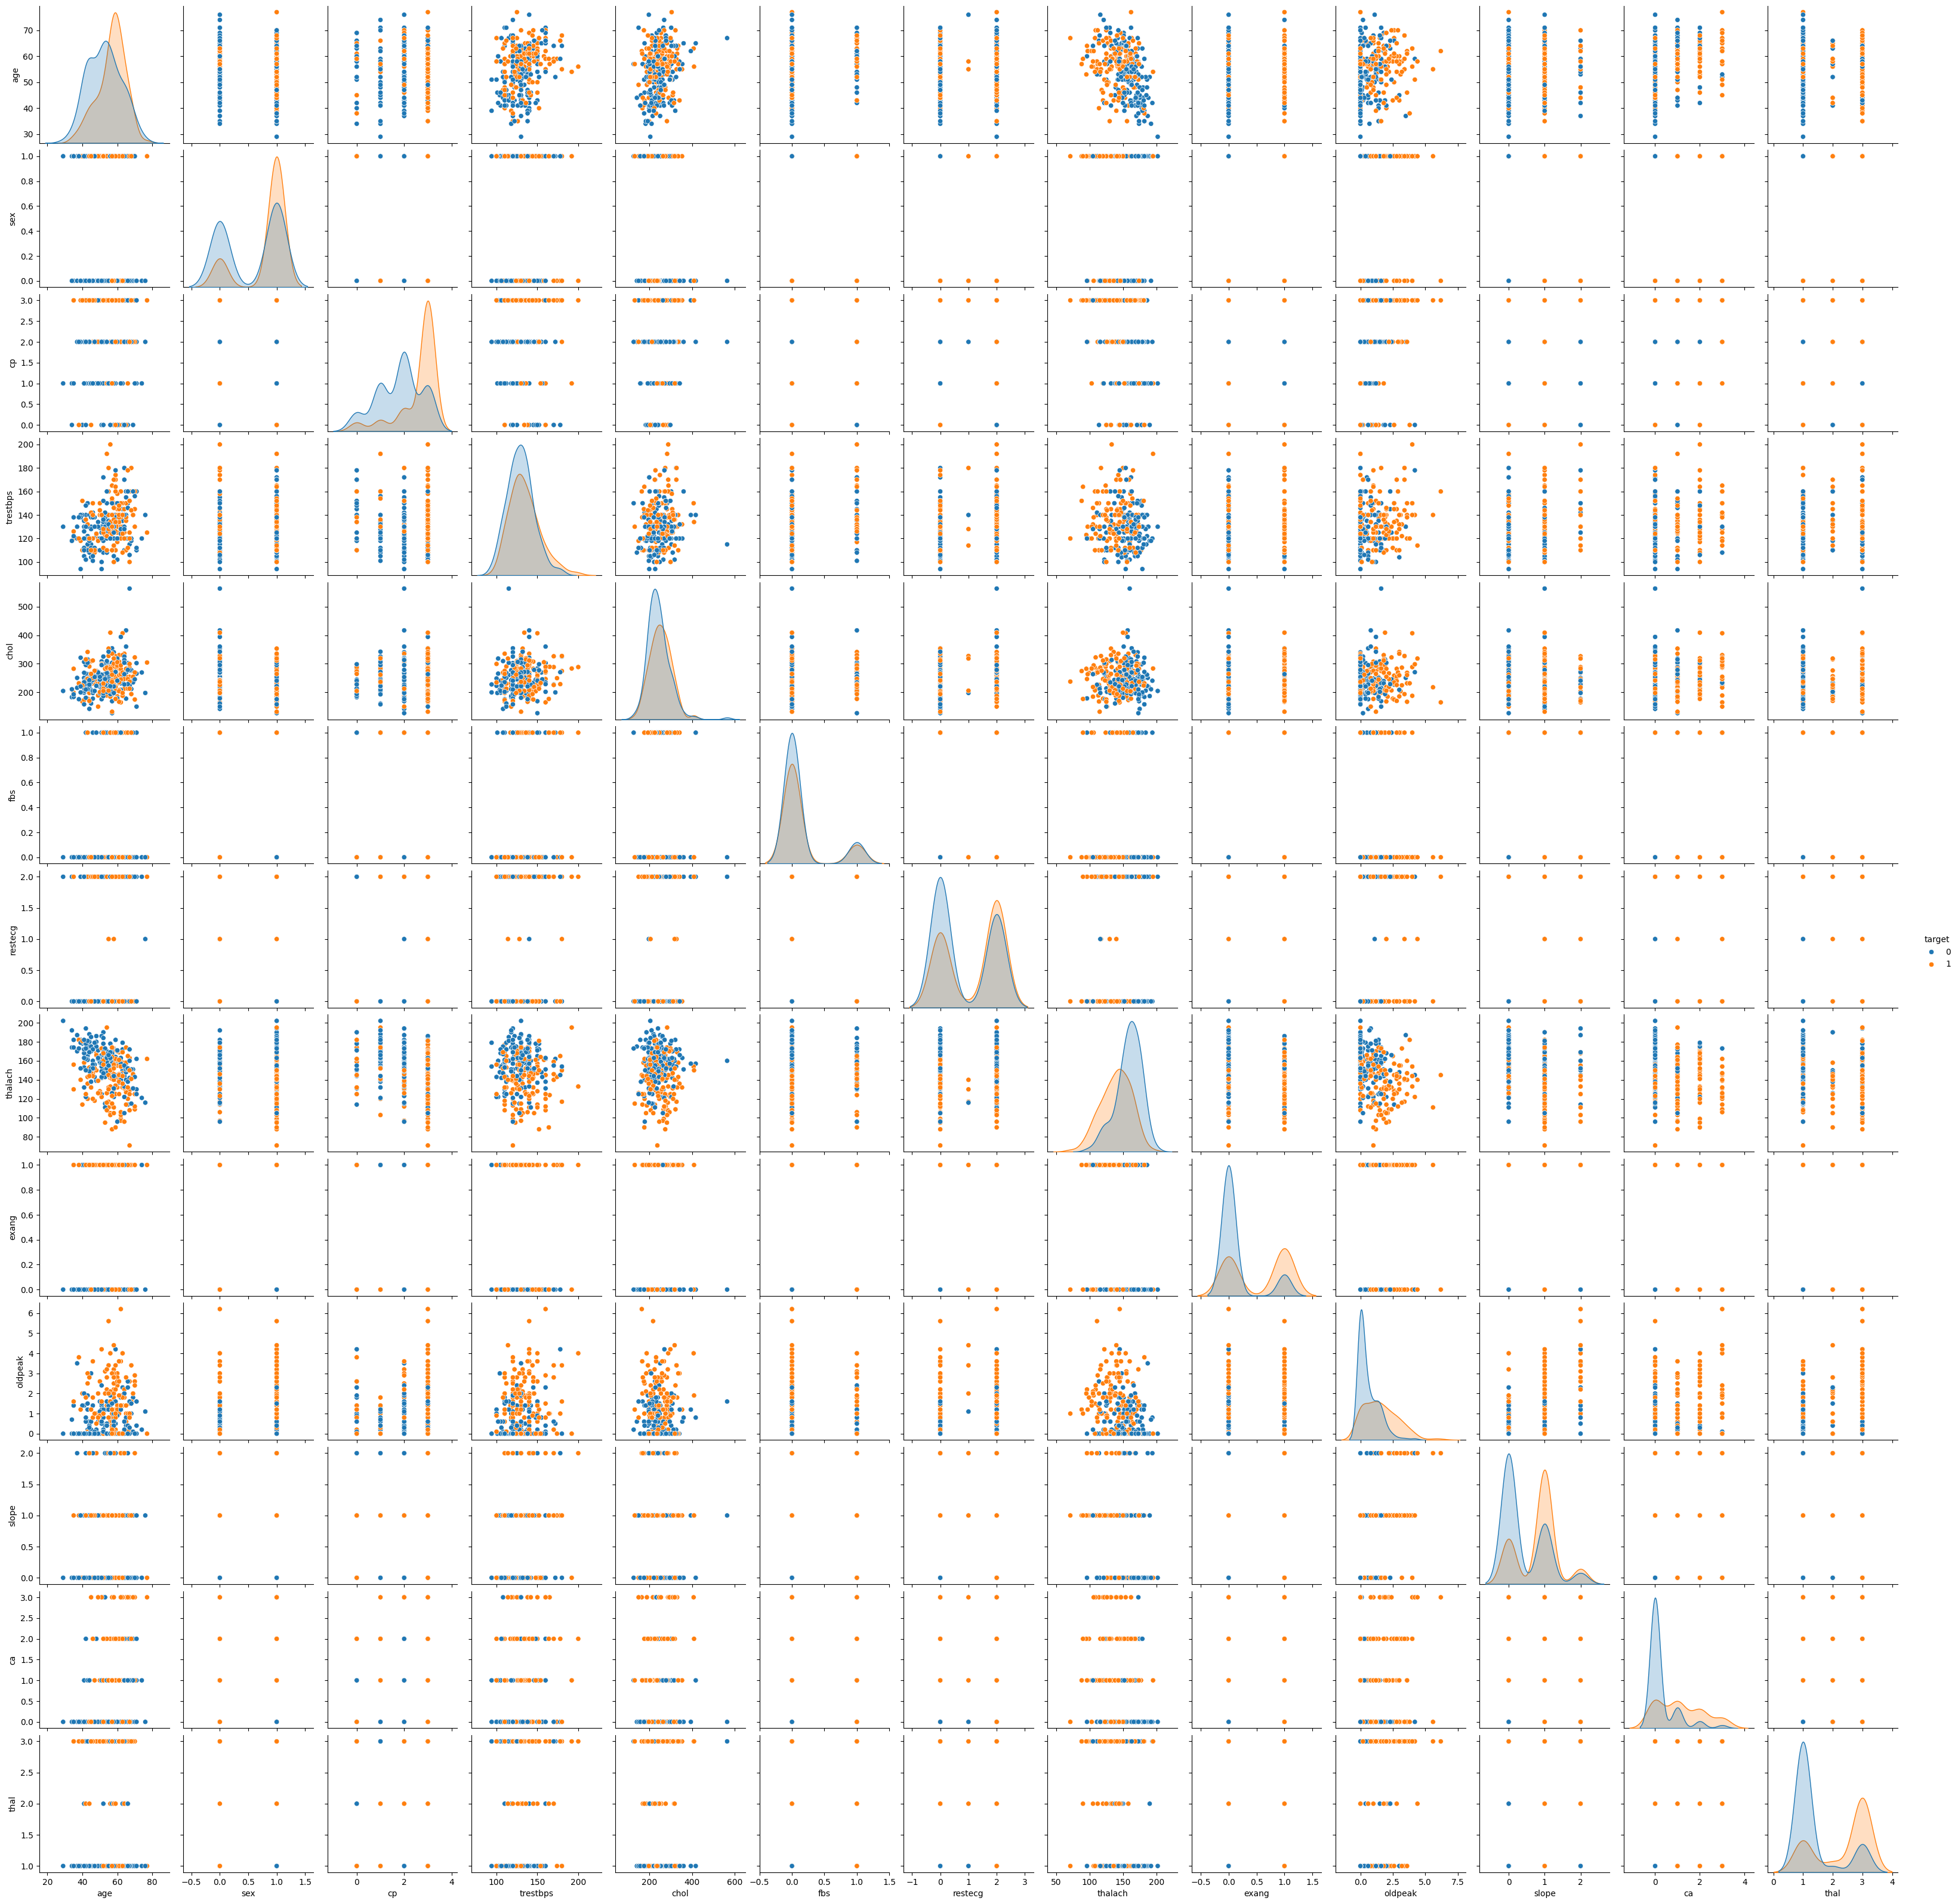

In [20]:
sns.pairplot(df, hue='target')
plt.show()

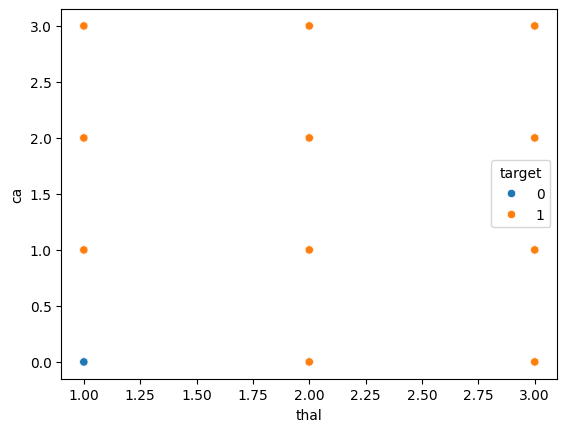

In [21]:
sns.scatterplot(x='thal',y='ca',hue='target',data=df)
plt.show()

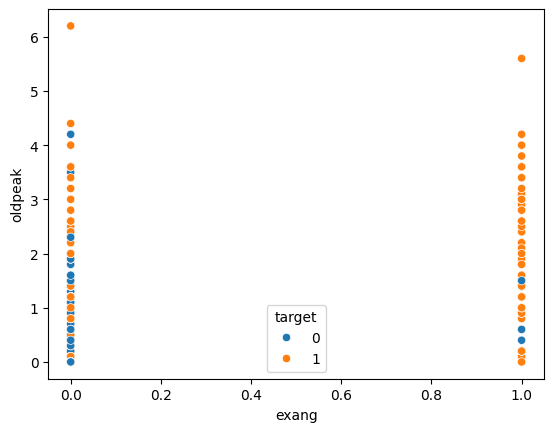

In [22]:
sns.scatterplot(x='exang',y='oldpeak',hue='target',data=df)
plt.show()

<Axes: xlabel='cp', ylabel='slope'>

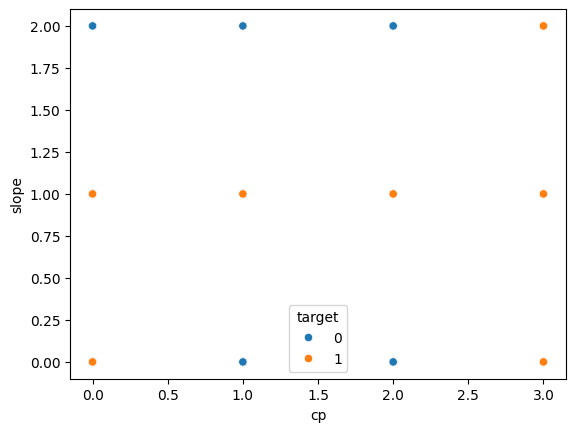

In [23]:
sns.scatterplot(x='cp',y='slope',hue='target',data=df)

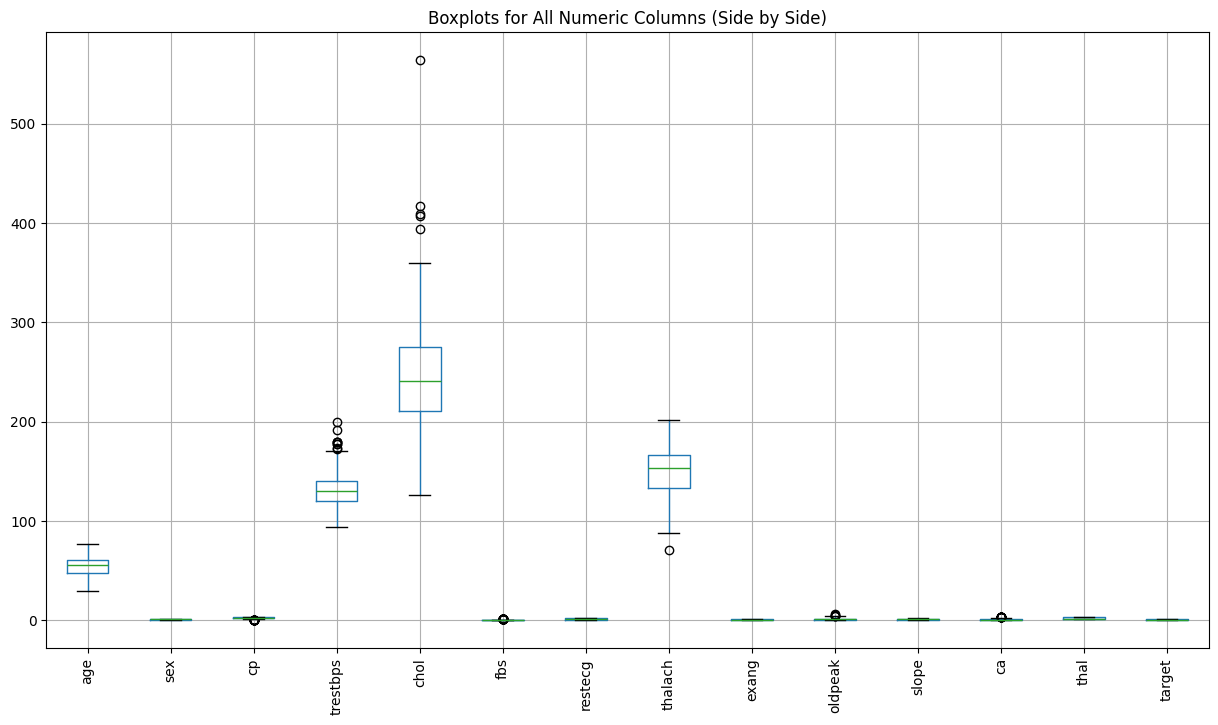

In [24]:
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for All Numeric Columns (Side by Side)")
plt.show()

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    df_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return df_filtered, outliers, lower_bound, upper_bound
for col in numeric_cols:
    df_filtered, outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"columns:{col}")
    print(f"ranges: [{lower:.2f}, {upper:.2f}]")
    print(f"no. of outliers: {len(outliers)}")
    print("-" * 40)
df_filtered, chol_outliers, l, u = detect_outliers_iqr(df, "chol")
print("Outliers in chol column:")
print(chol_outliers)
print("Filtered DataFrame (excluding outliers):")
print(df_filtered)

columns:age
ranges: [28.50, 80.50]
no. of outliers: 0
----------------------------------------
columns:sex
ranges: [-1.50, 2.50]
no. of outliers: 0
----------------------------------------
columns:cp
ranges: [0.50, 4.50]
no. of outliers: 23
----------------------------------------
columns:trestbps
ranges: [90.00, 170.00]
no. of outliers: 9
----------------------------------------
columns:chol
ranges: [115.00, 371.00]
no. of outliers: 5
----------------------------------------
columns:fbs
ranges: [0.00, 0.00]
no. of outliers: 45
----------------------------------------
columns:restecg
ranges: [-3.00, 5.00]
no. of outliers: 0
----------------------------------------
columns:thalach
ranges: [84.75, 214.75]
no. of outliers: 1
----------------------------------------
columns:exang
ranges: [-1.50, 2.50]
no. of outliers: 0
----------------------------------------
columns:oldpeak
ranges: [-2.40, 4.00]
no. of outliers: 5
----------------------------------------
columns:slope
ranges: [-1.50, 2.5

In [26]:
df["chol"]=df["chol"].astype(float)
df["slope"]=df["slope"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


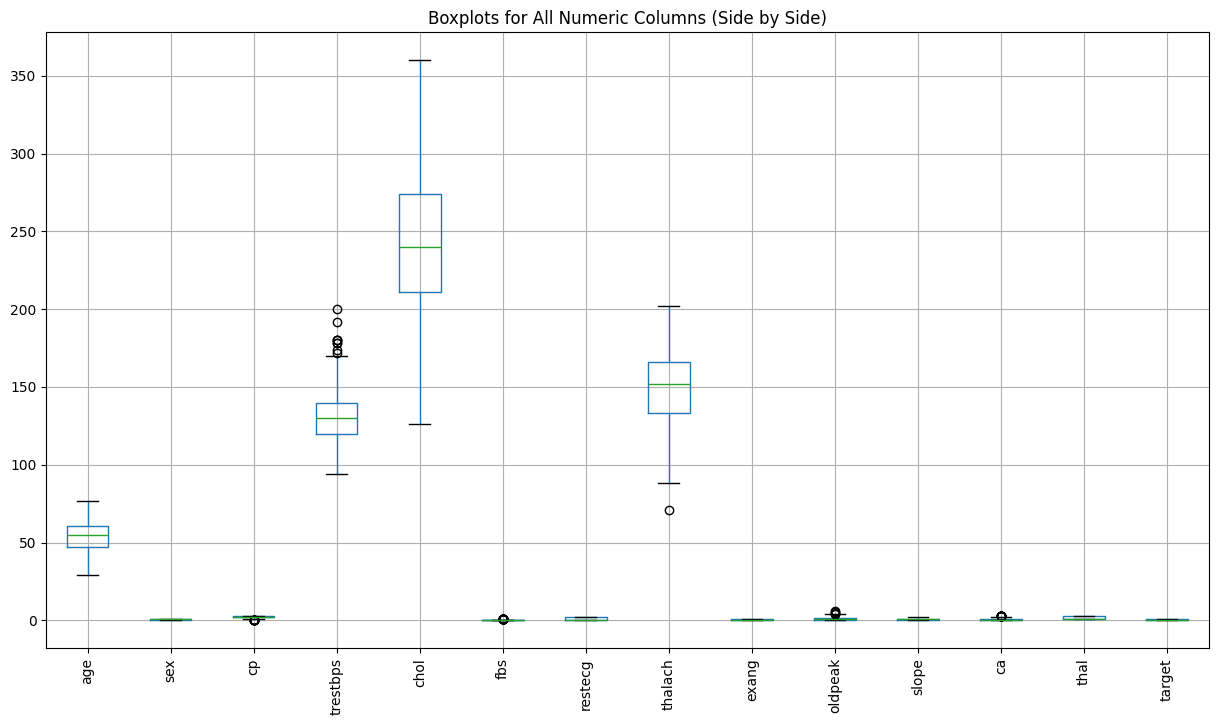

In [27]:
plt.figure(figsize=(15, 8))
df_filtered.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for All Numeric Columns (Side by Side)")
plt.show()

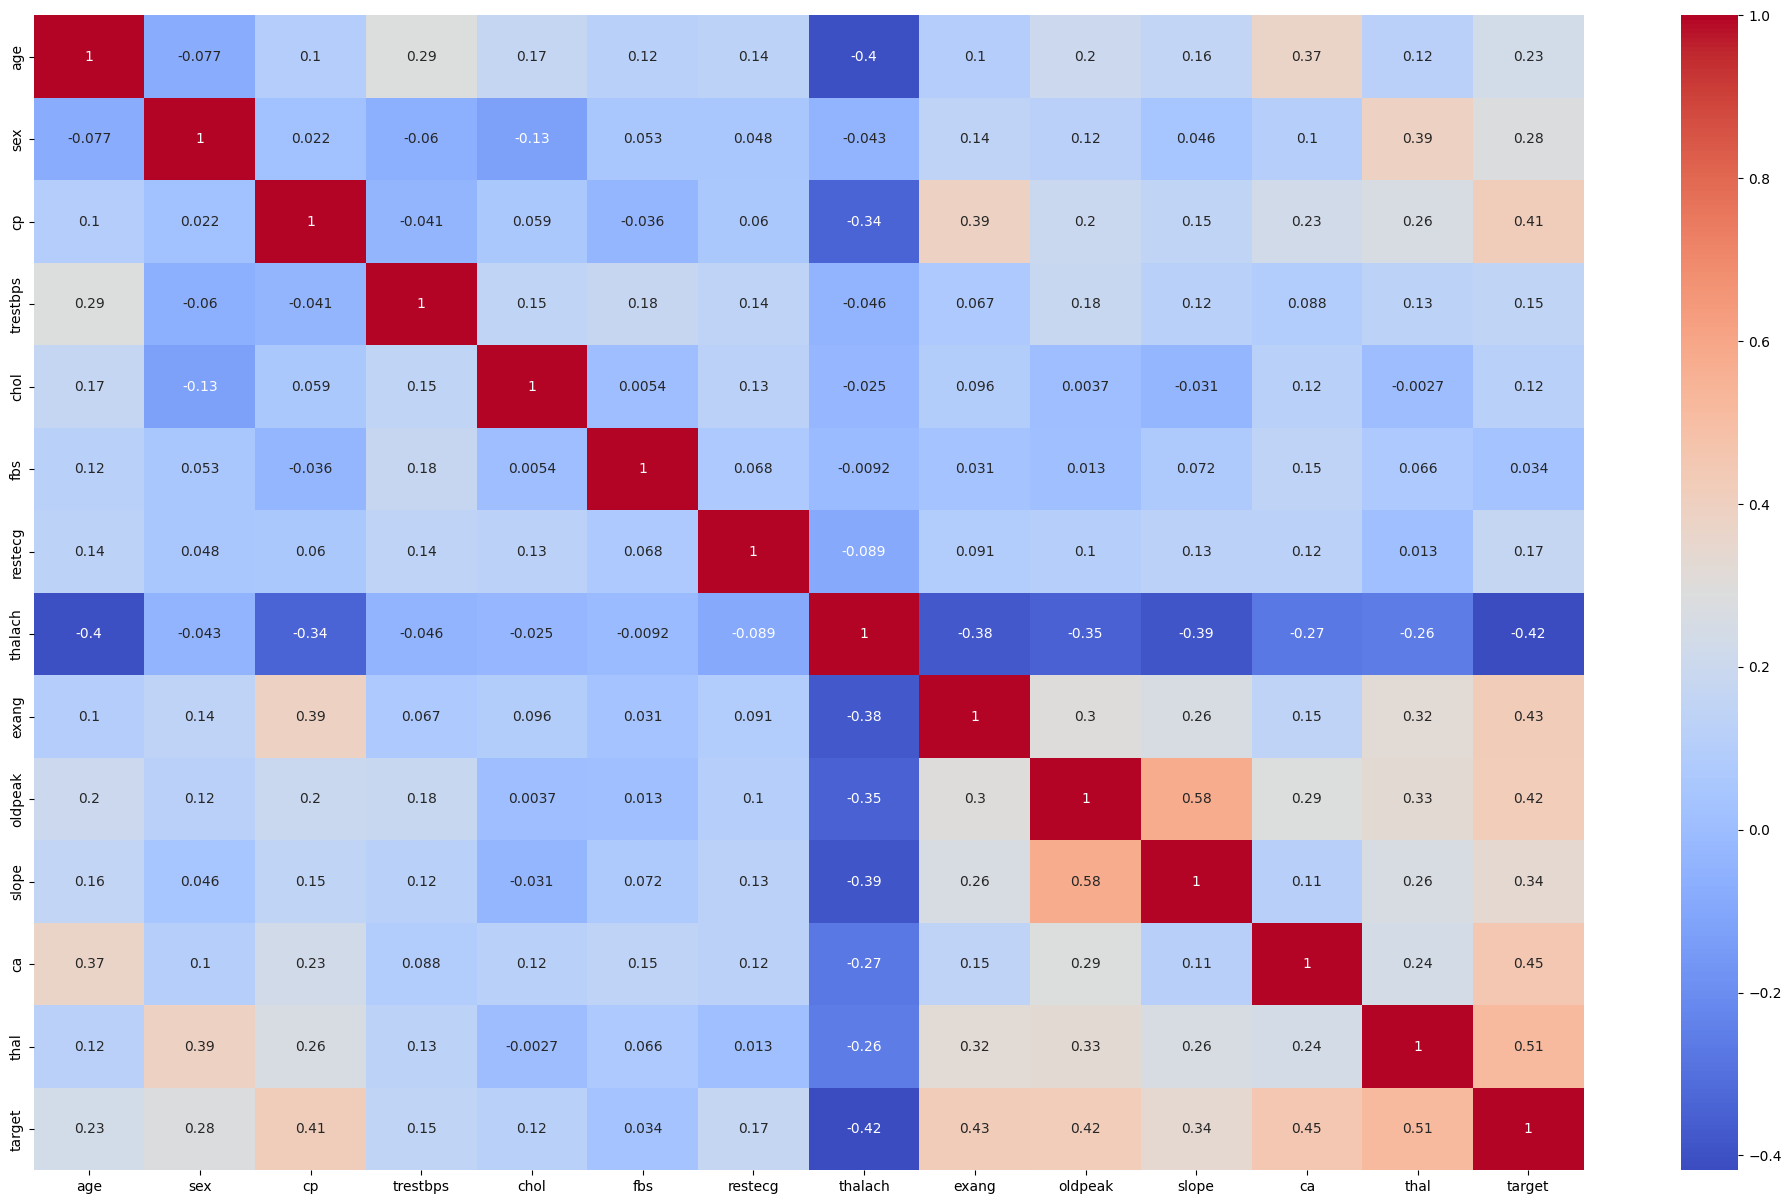

In [28]:
plt.figure(figsize=(25,15))
sns.heatmap(df_filtered.corr(),annot=True, cmap='coolwarm')
plt.show()

In [29]:
columns_selected_for_trainning = ['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] # 'trestbps', 'chol', 'fbs', 'restecg'

In [30]:
df_filtered[columns_selected_for_trainning].head()

,age,sex,cp,exang,oldpeak,slope,ca,thal
0,63,1,0,0,2.3,2,0,2
1,67,1,3,1,1.5,1,3,1
2,67,1,3,1,2.6,1,2,3
3,37,1,2,0,3.5,2,0,1
4,41,0,1,0,1.4,0,0,1


#Encoding

In [31]:
'''categorical_cols = ["cp", "restecg", "slope", "thal"]
binary_cols = ["sex", "fbs", "exang"]
ordinal_cols = ["ca"]'''

'categorical_cols = ["cp", "restecg", "slope", "thal"]\nbinary_cols = ["sex", "fbs", "exang"]\nordinal_cols = ["ca"]'

In [32]:
'''df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype({col: int for col in df.select_dtypes('bool').columns})'''

"df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)\ndf = df.astype({col: int for col in df.select_dtypes('bool').columns})"

In [33]:
print("Final shape:", df.shape)
df.head()

Final shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233.0,1,2,150,0,2.3,2.0,0,2,0
1,67,1,3,160,286.0,0,2,108,1,1.5,1.0,3,1,1
2,67,1,3,120,229.0,0,2,129,1,2.6,1.0,2,3,1
3,37,1,2,130,250.0,0,0,187,0,3.5,2.0,0,1,0
4,41,0,1,130,204.0,0,2,172,0,1.4,0.0,0,1,0


In [34]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:

num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#Modeling

Logistic Regression

In [36]:
baseline_model = LogisticRegression(max_iter=1000, solver="lbfgs")
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

baseline_acc = accuracy_score(y_test, y_pred_base)
baseline_prec = precision_score(y_test, y_pred_base)
baseline_rec = recall_score(y_test, y_pred_base)
baseline_f1 = f1_score(y_test, y_pred_base)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print("=== Logistic Regression (Baseline) ===")
print("Accuracy :", baseline_acc)
print("Precision:", baseline_prec)
print("Recall   :", baseline_rec)
print("F1 Score :", baseline_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_base))

=== Logistic Regression (Baseline) ===
Accuracy : 0.8688524590163934
Precision: 0.8125
Recall   : 0.9285714285714286
F1 Score : 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



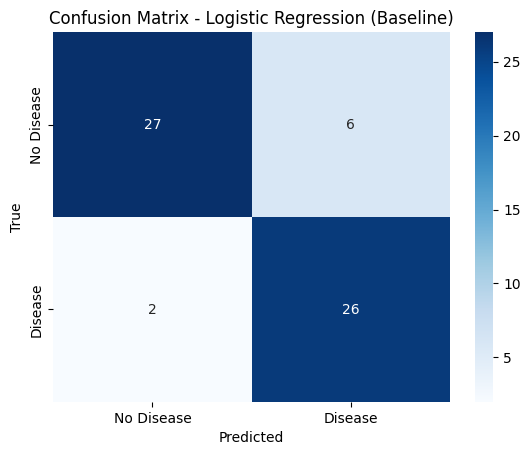

In [38]:
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

XGBoost

In [39]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:22:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_prec = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

In [41]:
print("=== XGBoost ===")
print("Accuracy :", xgb_acc)
print("Precision:", xgb_prec)
print("Recall   :", xgb_rec)
print("F1 Score :", xgb_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


=== XGBoost ===
Accuracy : 0.8688524590163934
Precision: 0.8125
Recall   : 0.9285714285714286
F1 Score : 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



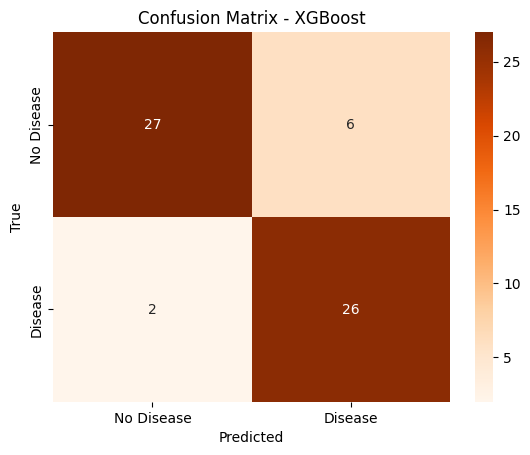

In [42]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest

In [43]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [44]:
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf)
rf_rec = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)


In [45]:
print("=== Random Forest ===")
print("Accuracy :", rf_acc)
print("Precision:", rf_prec)
print("Recall   :", rf_rec)
print("F1 Score :", rf_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy : 0.8852459016393442
Precision: 0.8387096774193549
Recall   : 0.9285714285714286
F1 Score : 0.8813559322033898

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



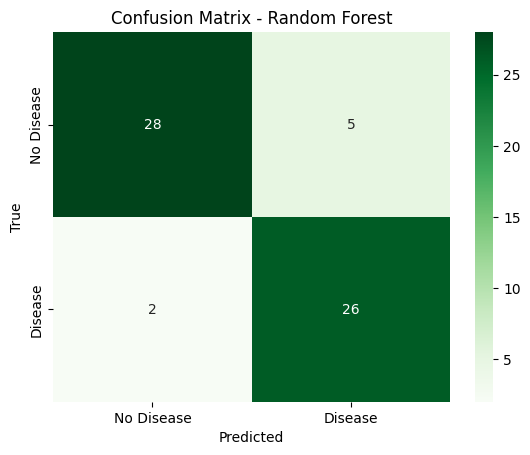

In [46]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [47]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [baseline_acc, rf_acc, xgb_acc],
    "Precision": [baseline_prec, rf_prec, xgb_prec],
    "Recall": [baseline_rec, rf_rec, xgb_rec],
    "F1 Score": [baseline_f1, rf_f1, xgb_f1]
})

In [48]:
print("\n=== Model Comparison ===")
print(results)



=== Model Comparison ===
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.868852    0.81250  0.928571  0.866667
1        Random Forest  0.885246    0.83871  0.928571  0.881356
2              XGBoost  0.868852    0.81250  0.928571  0.866667


#Hyperparameter Tuning

Random forest

In [49]:

rf_param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

In [50]:
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)


In [51]:
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)
print("Best RF F1 Score (CV):", rf_grid.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best RF Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RF F1 Score (CV): 0.8112487512487514


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
474 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

In [52]:
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

In [53]:
rf_acc_tuned = accuracy_score(y_test, y_pred_rf_tuned)
rf_prec_tuned = precision_score(y_test, y_pred_rf_tuned)
rf_rec_tuned = recall_score(y_test, y_pred_rf_tuned)
rf_f1_tuned = f1_score(y_test, y_pred_rf_tuned)

print("=== Tuned Random Forest ===")
print("Accuracy :", rf_acc_tuned)
print("Precision:", rf_prec_tuned)
print("Recall   :", rf_rec_tuned)
print("F1 Score :", rf_f1_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

=== Tuned Random Forest ===
Accuracy : 0.9016393442622951
Precision: 0.8666666666666667
Recall   : 0.9285714285714286
F1 Score : 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



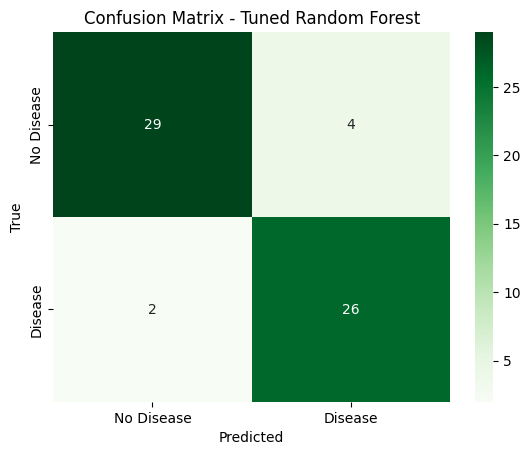

In [54]:
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

XGBoost

In [55]:
xgb_param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5]
}


In [56]:
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric="logloss"
    ),
    param_grid=xgb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [57]:
xgb_grid.fit(X_train, y_train)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB F1 Score (CV):", xgb_grid.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
Best XGB F1 Score (CV): 0.8074148972025614


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:29:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [58]:
best_xgb = xgb_grid.best_estimator_
print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB F1 Score (CV):", xgb_grid.best_score_)

Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}
Best XGB F1 Score (CV): 0.8074148972025614


In [59]:
y_pred_xgb_tuned = best_xgb.predict(X_test)


In [60]:
xgb_acc_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
xgb_prec_tuned = precision_score(y_test, y_pred_xgb_tuned)
xgb_rec_tuned = recall_score(y_test, y_pred_xgb_tuned)
xgb_f1_tuned = f1_score(y_test, y_pred_xgb_tuned)

In [61]:
print("\n=== Tuned XGBoost ===")
print("Accuracy :", xgb_acc_tuned)
print("Precision:", xgb_prec_tuned)
print("Recall   :", xgb_rec_tuned)
print("F1 Score :", xgb_f1_tuned)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned))



=== Tuned XGBoost ===
Accuracy : 0.8688524590163934
Precision: 0.8125
Recall   : 0.9285714285714286
F1 Score : 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



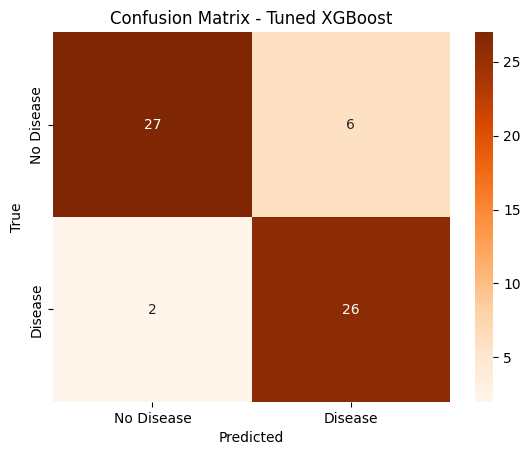

In [62]:
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
sns.heatmap(cm_xgb_tuned, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [63]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,48,1,3,124,274.0,0,2,166,0,0.5,1.0,0,3
208,55,1,1,130,262.0,0,0,155,0,0.0,0.0,0,1
167,54,0,1,132,288.0,1,2,159,1,0.0,0.0,1,1
105,54,1,1,108,309.0,0,0,156,0,0.0,0.0,0,3
297,57,0,3,140,241.0,0,0,123,1,0.2,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,62,0,3,140,394.0,0,2,157,0,1.2,1.0,0,1
136,70,1,3,145,174.0,0,0,125,1,2.6,2.0,0,3
2,67,1,3,120,229.0,0,2,129,1,2.6,1.0,2,3
189,69,1,2,140,254.0,0,2,146,0,2.0,1.0,3,3


In [79]:
import pickle

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

bundle = {
    "model": best_xgb,
    "scaler": scaler,
    "features": features,
    "numeric_cols": numeric_cols
}

with open("heart_model_xgbb.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("Model bundle saved successfully as 'heart_model_xgbb.pkl'.")

Model bundle saved successfully as 'heart_model_xgbb.pkl'.


In [83]:
!pip install streamlit
!pip install streamlit pyngrok

In [80]:
!curl ifconfig.me


35.230.163.10

In [96]:
!pip install -q streamlit flask requests
!streamlit run Gui.py --server.port 8501 &>/dev/null &


In [97]:
!npm install -g localtunnel
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 22 packages in 2s
⠙
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://sour-pianos-say.loca.lt
^C
